In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (11.5, 10.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 3,
          'lines.markersize': 7,
          'font.family': 'sans-serif',
          'figure.autolayout': True}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [3]:
n_runs = 1 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

# Relativistic parameters of the study, used for the post process analysis
neps_y = 2e-6 # m
gamma_0 = 287.8 
beta_0  = np.sqrt(1-1/gamma_0**2)

In [5]:
# Noise parameters
type_of_noise = 'PN'
rms_ksi_list =  [0.04, 0.06, 0.08, 0.2, 0.3, 0.4, 0.5, 0.6,0.8, 1.0]
#rms_ksi_list= [0.2, 0.6]
peak= 0.18
# tune spread
delta_rms = 2.1e-4
ayy_min = -3e5 # -1e6 
ayy_max =  3e5  # 1e6
N_size = 10
ayy_list = list(np.linspace(ayy_min, ayy_max, N_size))

In [9]:
ex_dict = {} # type: dictionary
ey_dict = {}
intensity = {}
for rms_ksi in rms_ksi_list:
    print(rms_ksi) # status of file loading
    path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/tbt_from_GPUs/long_rmsKsi{}/'.format(rms_ksi)
    for index, ayy in enumerate(ayy_list):
        #print(index) # status of file loading
        for run in range(n_runs):
            temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi, run) # the suffix of the name of the current study
            # A. load the turn by turn data in a dictionary
            temp_dict = pickle.load( open( path_to_data+'tbt_{}.pkl'.format(index), "rb" ) )
            # B. Create a different list for each run and save the emittance values
            ex_dict[temp_name] = temp_dict['neps_x'] 
            ey_dict[temp_name] = temp_dict['neps_y']
            intensity[temp_name]= temp_dict['intensity']

0.04
0.06
0.08
0.2
0.3
0.4
0.5
0.6
0.8
1.0


#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [10]:
ex_mean = {}
ey_mean = {}

ex_std = {}
ey_std = {}

for rms_ksi in rms_ksi_list:
    print(rms_ksi) # status of this cell's computations 
    for ayy in ayy_list:
        ex_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        ex_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        ey_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)] = []
        #print(ayy)
        for turn in range(int(turns)):
            ex_temp = []
            ey_temp = []

            # keep all the emittance values for all the runs
            for run in range(n_runs):
                temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi,run)
                ex_temp.append(ex_dict[temp_name][turn])
                ey_temp.append(ey_dict[temp_name][turn])
            # calculate and append the mean of the emittance value for every turn
            ex_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.mean(ex_temp))
            ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.mean(ey_temp))
            # calculate and append the standard deviation of the emittance value for every turn
            ex_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.std(ex_temp))
            ey_std['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)].append(np.std(ey_temp))    

0.04
0.06
0.08
0.2
0.3
0.4
0.5
0.6
0.8
1.0


#### 3) Convert turns to time [s]

In [11]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

#### 4) Plot evolution of the emittance for selected αyy and rms ξ values

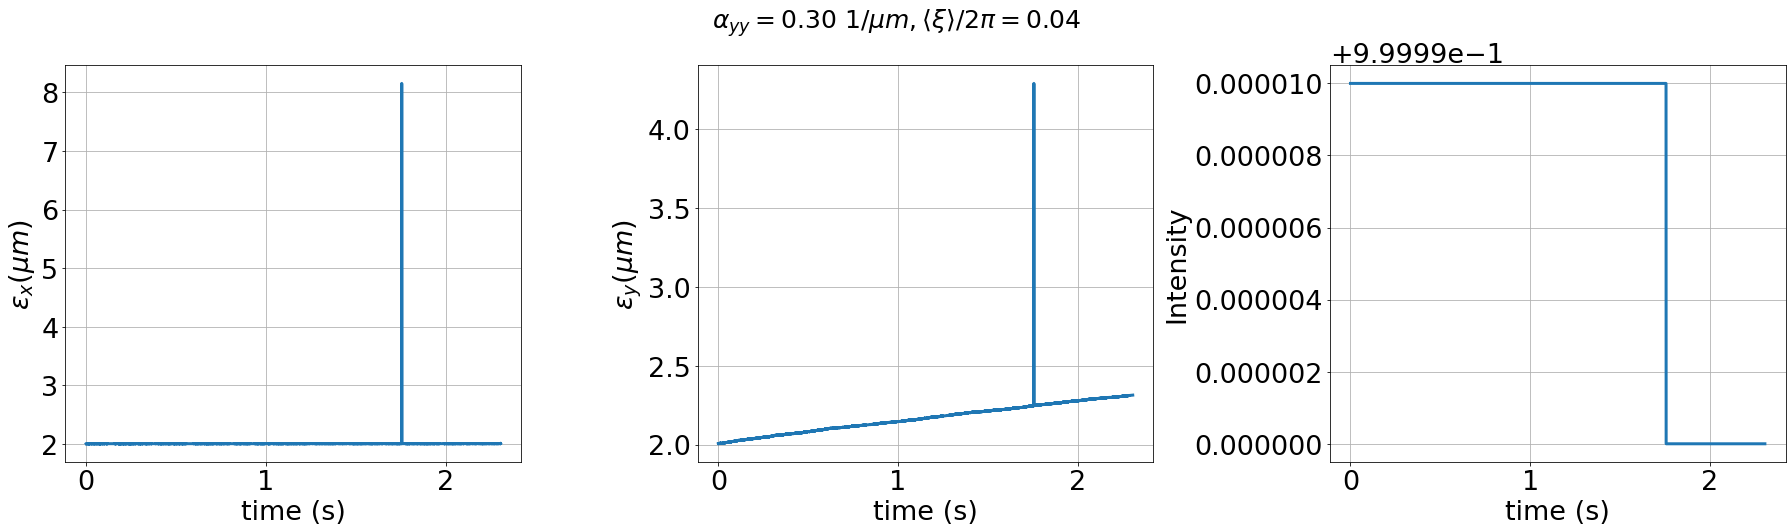

In [12]:
ayy = ayy_list[-1]
rms_ksi = rms_ksi_list[0]

plt.figure(figsize=(25,7))
plt.suptitle(r'$\alpha_{yy}= %.2f$'%(ayy/1e6)+' 1/'+r'$ \mu m, \langle \xi \rangle / 2\pi = %.2f$'%(rms_ksi), fontsize=25, y=1.05)
# Horizontal emittance evolution
plt.subplot(131)
plt.plot(time, np.array(ex_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0')
plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_x (\mu m)$')
plt.grid()
plt.tight_layout()

# Vertical emittance evolution   
plt.subplot(132)
plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0')    
plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_y (\mu m)$')
plt.grid()
plt.tight_layout()

# Intensity
plt.subplot(133)
plt.plot(time, np.array(intensity['DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi, run)]), c='C0')    
plt.xlabel('time (s)')
plt.ylabel('Intensity')
#plt.yscale('log')
plt.grid()
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig('nepsx_nepsy_intensity_270GeV_SPS_2CCsLocal_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_ayy{:.3f}e6_rmsKsi{}_long.png'.format(ayy/1e6, rms_ksi), bbox_inches='tight')

#### 7) Compute the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [13]:
m_dict = {}
b_dict = {} 
err_dict = {}

for rms_ksi in rms_ksi_list:
    m_dict['rmsKsi{}'.format(rms_ksi)] = []
    b_dict['rmsKsi{}'.format(rms_ksi)] = []
    err_dict['rmsKsi{}'.format(rms_ksi)] = []
    
    for ayy in ayy_list:
        # linear fit
        [m_temp, b_temp], cov_temp = np.polyfit(time, ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)], 1, cov=True)
        m_dict['rmsKsi{}'.format(rms_ksi)].append(m_temp)
        b_dict['rmsKsi{}'.format(rms_ksi)].append(b_temp)
        # compute the error of the gradient of the fit slope
        err_dict['rmsKsi{}'.format(rms_ksi)].append(np.sqrt(np.diag(cov_temp))[0])

#### Plot the fit for an example case of tune spread

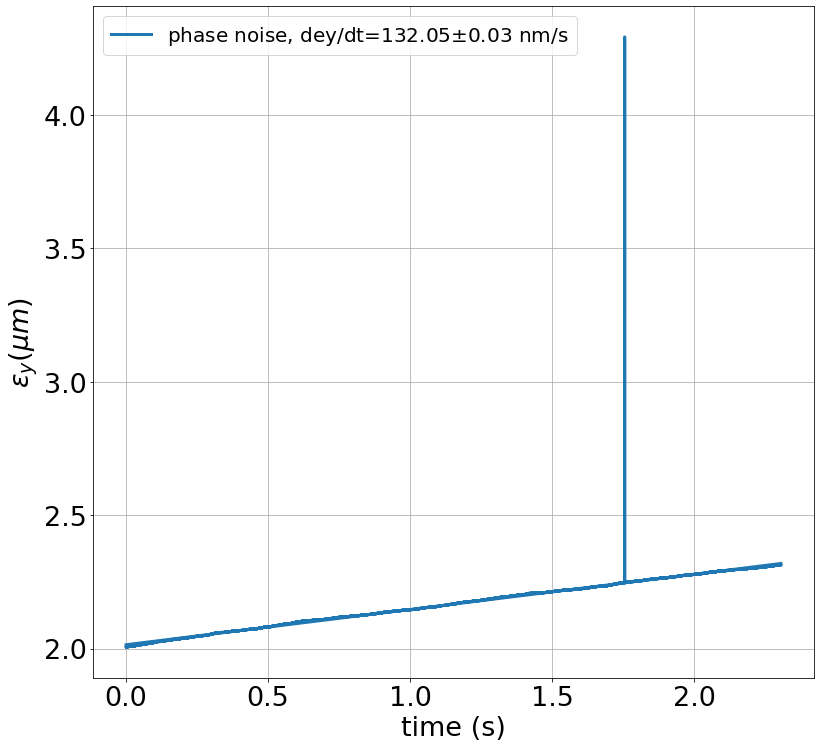

In [14]:
index = -1
ayy = ayy_list[index]
rms_ksi = rms_ksi_list[0]
plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6, c='C0')
plt.plot(time, (m_dict['rmsKsi{}'.format(rms_ksi)][index]*time+b_dict['rmsKsi{}'.format(rms_ksi)][index])*1e6, c = 'C0', label='phase noise, dey/dt={0:.2f}'.format(m_dict['rmsKsi{}'.format(rms_ksi)][index]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict['rmsKsi{}'.format(rms_ksi)][index]*1e9), linewidth = 3)

plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_y (\mu m$)')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

#### 8) Compute the growth rate of the geometric emittance

In [15]:
m_dict_geom = {}
b_dict_geom = {} 
err_dict_geom = {}

for rms_ksi in rms_ksi_list:
    m_dict_geom['rmsKsi{}'.format(rms_ksi)] = []
    b_dict_geom['rmsKsi{}'.format(rms_ksi)] = []
    err_dict_geom['rmsKsi{}'.format(rms_ksi)] = []
    
    for ayy in ayy_list:
        # linear fit
        [m_temp, b_temp], cov_temp = np.polyfit(time, ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)]/(beta_0*gamma_0), 1, cov=True)
        m_dict_geom['rmsKsi{}'.format(rms_ksi)].append(m_temp)
        b_dict_geom['rmsKsi{}'.format(rms_ksi)].append(b_temp)
        # compute the error of the gradient of the fit slope
        err_dict_geom['rmsKsi{}'.format(rms_ksi)].append(np.sqrt(np.diag(cov_temp))[0])

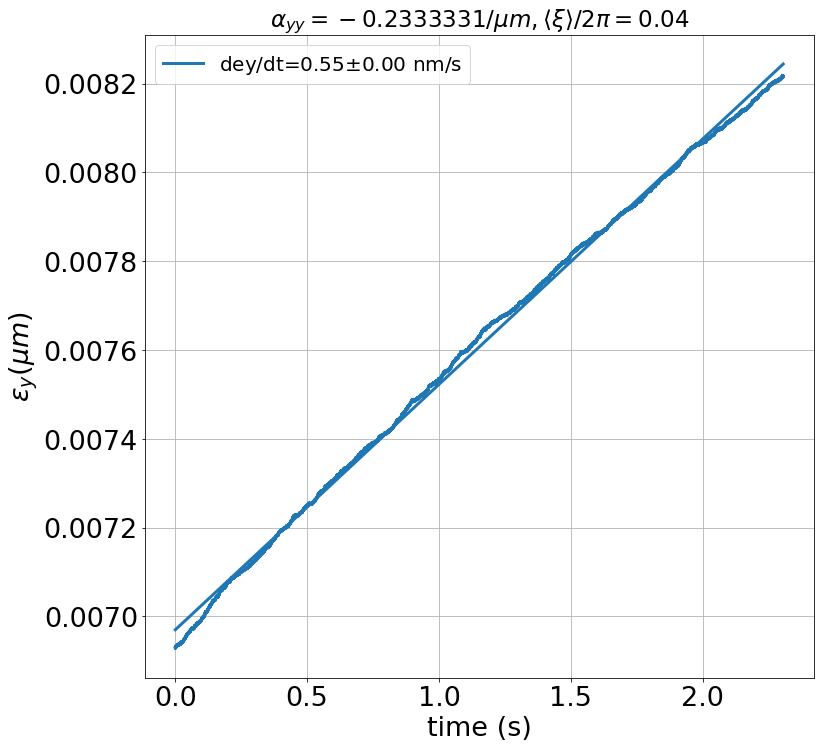

In [16]:
index = 1
ayy = ayy_list[index]
rms_ksi = rms_ksi_list[0]
plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(ayy, rms_ksi)])*1e6/(beta_0*gamma_0), c='C0')
plt.plot(time, (m_dict_geom['rmsKsi{}'.format(rms_ksi)][index]*time+b_dict_geom['rmsKsi{}'.format(rms_ksi)][index])*1e6, c = 'C0', label='dey/dt={0:.2f}'.format(m_dict_geom['rmsKsi{}'.format(rms_ksi)][index]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict_geom['rmsKsi{}'.format(rms_ksi)][index]*1e9), linewidth = 3)

plt.xlabel('time (s)')
plt.ylabel(r'$\epsilon_y (\mu m$)')
plt.title(r'$\alpha_{yy}= %f 1/ \mu m, \langle \xi \rangle / 2\pi = %.2f$'%(ayy/1e6, rms_ksi))
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_geom_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

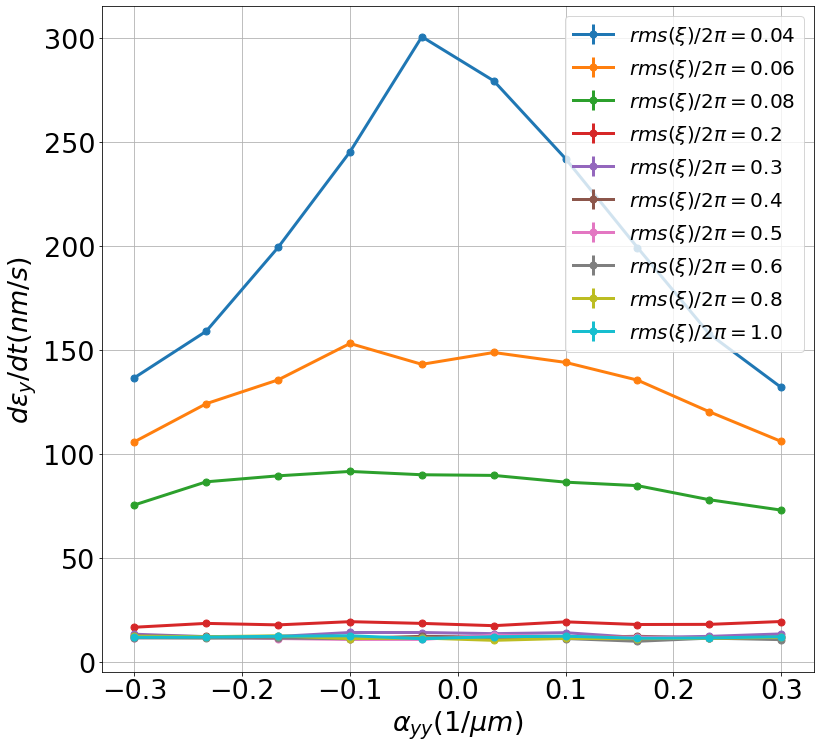

In [17]:
fig, ax = plt.subplots()
for rms_ksi in rms_ksi_list:
    ax.errorbar(np.array(ayy_list)/1e6, np.array(m_dict['rmsKsi{}'.format(rms_ksi)])*1e9,yerr= np.array(err_dict['rmsKsi{}'.format(rms_ksi)])*1e9, marker ='o', label=r'$rms(\xi)  / 2 \pi = {} $'.format(rms_ksi))
ax.set_xlabel(r'$\alpha_{yy} (1/\mu m)$')
ax.set_ylabel(r'$d\epsilon_y /dt (nm/s)$')
#ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
plt.grid()
plt.legend()
plt.tight_layout()
save_fig = False
if save_fig:
    plt.savefig('emit_growth_vs_DQy_vs_rmsKsiScan_LongBunch.png'.format(rms_ksi))

#### **8) Compute the rms tune spread**
**Detuning** due to octupole non-linearity for particles with given betatron amplitudes $A_x, A_y$ is given by:

\begin{equation}
\Delta \nu_y (J_y, J_x) = \nu_y(J_y, J_x) - \nu_{y_0} = \alpha_{yy} J_y - \alpha_{yx}J_x, (1)
\end{equation}
where th transverse actions $J_y$ and $J_x$ are given by:

\begin{equation}
J_{x,y} = \frac{A^2_{x,y}}{2\beta_{x,y}(s)}, (2)
\end{equation}
where $\beta_{x,y}(s)$ the beta function at the locations $s$ of the lattice.


**In our studies:** $\alpha_{yx}=0$ and therefore the equation (1) written as:

\begin{equation}
\Delta \nu_y (J_y) = \alpha_{yy} J_y, (3)
\end{equation}

Therefore, **the RMS tune spread**, from the Landau octupoles, can be computed by:
\begin{equation}
\Delta \nu_y (J_y)_{RMS} = \alpha_{yy}* 2*J_{y_{RMS}}, (4)
\end{equation}

, where the factor 2 is required to give the correct tune spread when Sixtracklib is used.

Note that $J_{y_{RMS}} = e_{y,geom} = e_{y,norm}/ \beta _0 \gamma_0$, where $\beta _0 \gamma_0$ the relativistic parameters of the reference particle

In [19]:
neps_y = 2e-6 # [m]
# Compute the initial RMS Jy. We assume that the initial normalised emittance for each study is 2μm. In reality when the distribuiton is created we don't get exaclty 2μm
Jy_rms = ey_geom = neps_y/(beta_0*gamma_0)# [m] 
DQy_rms = np.array(ayy_list)*2*Jy_rms

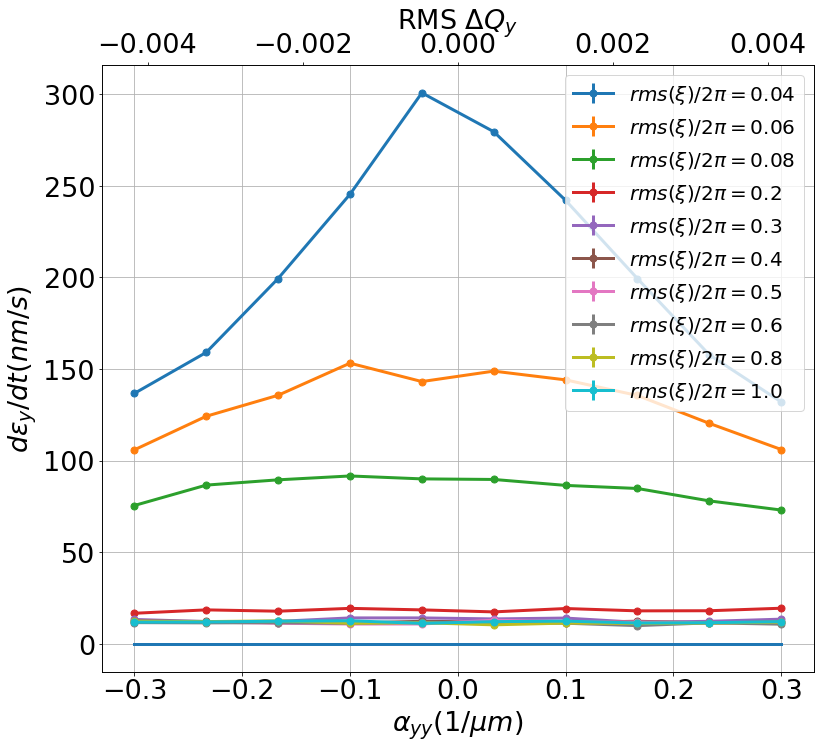

In [21]:
fig, ax1 = plt.subplots()
#rms_ksi_list = [0.2, 0.6]
for rms_ksi in rms_ksi_list:
    ax1.errorbar(np.array(ayy_list)/1e6, np.array(m_dict['rmsKsi{}'.format(rms_ksi)])*1e9,yerr= np.array(err_dict['rmsKsi{}'.format(rms_ksi)])*1e9, marker ='o', label=r'$rms(\xi)  / 2 \pi = {} $'.format(rms_ksi))
ax1.set_xlabel(r'$\alpha_{yy} (1/\mu m)$')
ax1.set_ylabel(r'$d\epsilon_y /dt (nm/s)$')
ax1.grid()
ax1.legend(loc=1)

ax2 = ax1.twiny() 
ax2.plot(np.array(DQy_rms), np.zeros(len(ayy_list)), )
ax2.set_xlabel('RMS '+r'$\Delta Q_y $')

#plt.ylim(7.5, 20.0) # long bunch
#plt.ylim(7.5, 175) # short bunch, smaller ξ/2π=0.08
#plt.ylim(7.5, 320) # short bunch

plt.tight_layout()
savefig = True
if savefig:
     plt.savefig('emit_growth_vs_DQy_vs_rmsKsiScanshort_ShortBunch_DQysecondaryHaxi_2rmsKsivaluesOnly_Qpx2.png'.format(rms_ksi))


#### **9) Intensity**

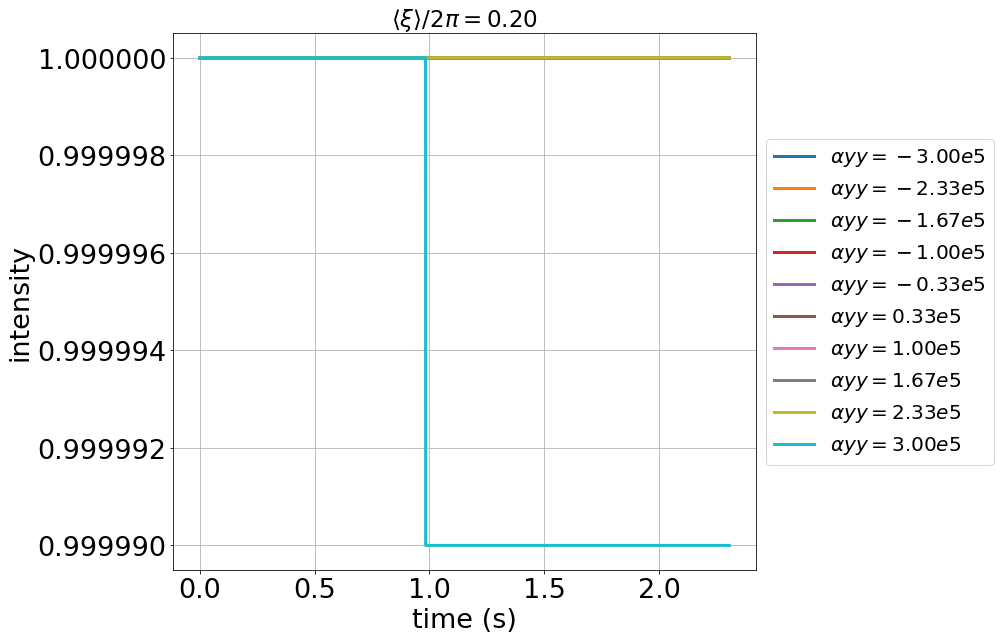

In [318]:
import matplotlib
fig = plt.figure(figsize=(14,9))
ax = plt.subplot(111)
for rms_ksi in rms_ksi_list[0:1]:
    for index, ayy in enumerate(ayy_list):
        for run in range(n_runs):
            temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi, run) # the suffix
        ax.plot(time, intensity[temp_name], label=r'$ \alpha yy = {:.2f}e5$'.format(ayy/1e5))
ax.set_ylabel('intensity')
ax.set_xlabel('time (s)')
#ax.set_yscale('log')
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'$\langle \xi \rangle / 2\pi = %.2f$'%(rms_ksi))
plt.tight_layout()
plt.grid()
save_fig = False
if save_fig:
    plt.savefig('intensity_vs_ayy_rmsKsi{}_LongBunch.png'.format(rms_ksi))